## Тема “Обучение без учителя”


In [3]:
#     Задание 1
#     Импортируйте библиотеки pandas, numpy и matplotlib.
#     Загрузите "Boston House Prices dataset" из встроенных наборов 
#     данных библиотеки sklearn.
#     Создайте датафреймы X и y из этих данных.
#     Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
#     с помощью функции train_test_split так, чтобы размер тестовой выборки
#     составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
#     Масштабируйте данные с помощью StandardScaler.
#     Постройте модель TSNE на тренировочный данных с параметрами:
#     n_components=2, learning_rate=250, random_state=42.
#     Постройте диаграмму рассеяния на этих данных.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.datasets as datasets

In [8]:
#Загружаем встроенный набор данных "Boston House Prices dataset"
load_data = datasets.load_boston()
for line in load_data.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
X = pd.DataFrame(load_data.data, columns = load_data.feature_names)
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
y = pd.DataFrame(load_data.target)
y.head(5)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [24]:
#Посмотрим на размерность данных:
X.shape, y.shape

((506, 13), (506, 1))

In [26]:
#Разобьем данные на тестовую и тренировочную выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [28]:
#Масштабируем данные с помощью StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_transformed = ss.fit_transform(X_train)
X_test_transformed = ss.transform(X_test)

X_train_transformed = pd.DataFrame(X_train_transformed, columns = load_data.feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns = load_data.feature_names)

In [29]:
#Построим модель t-SNE и визуализируем получившиеся данные
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_transformed)
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

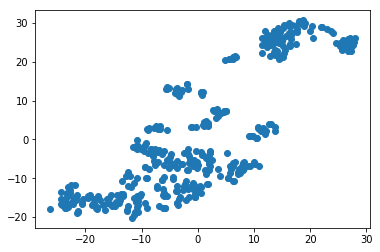

In [30]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

In [32]:
#     Задание 2
#     С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
#     используйте все признаки из датафрейма X_train.
#     Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
#     Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
#     и раскрасьте точки из разных кластеров разными цветами.
#     Вычислите средние значения price и CRIM в разных кластерах.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
label_train = kmeans.fit_predict(X_train_transformed)
pd.value_counts(label_train)

2    191
1    127
0     86
dtype: int64

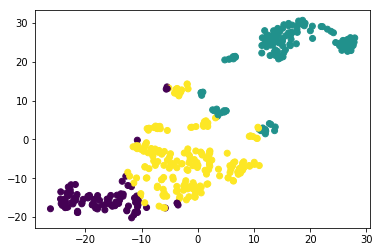

In [34]:
#Снова визуализируем данные:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = label_train)

In [76]:
#Вычислите средние значения price и CRIM в разных кластерах:
mean_0 = X_train[label_train == 0]['CRIM'].mean()
mean_1 = X_train[label_train == 1]['CRIM'].mean()
mean_2 = X_train[label_train == 2]['CRIM'].mean()


print(f'Среднее значение переменной CRIM для кластера под номером 0: {round(mean_0, 2)}')
print(f'Среднее значение переменной CRIM для кластера под номером 1: {round(mean_1, 2)}')
print(f'Среднее значение переменной CRIM для кластера под номером 2: {round(mean_2, 2)}')

Среднее значение переменной CRIM для кластера под номером 0: 0.07
Среднее значение переменной CRIM для кластера под номером 1: 10.8
Среднее значение переменной CRIM для кластера под номером 2: 0.42


In [52]:
mean_0 = y_train[label_train == 0].mean()[0]
mean_1 = y_train[label_train == 1].mean()[0]
mean_2 = y_train[label_train == 2].mean()[0]


print(f'Среднее значение price для кластера под номером 0: {round(mean_0, 2)}')
print(f'Среднее значение price для кластера под номером 1: {round(mean_1, 2)}')
print(f'Среднее значение price для кластера под номером 2: {round(mean_2, 2)}')

Среднее значение price для кластера под номером 0: 27.79
Среднее значение price для кластера под номером 1: 16.17
Среднее значение price для кластера под номером 2: 24.96


In [50]:
y_train[label_train == 0].mean()[0]

27.788372093023252

In [56]:
#     *Задание 3
#     Примените модель KMeans, построенную в предыдущем задании,
#     к данным из тестового набора.
#     Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


label_test = kmeans.predict(X_test_transformed)

mean_0 = X_test[label_test == 0]['CRIM'].mean()
mean_1 = X_test[label_test == 1]['CRIM'].mean()
mean_2 = X_test[label_test == 2]['CRIM'].mean()

print('Тестовые данные:')
print(f'Среднее значение переменной CRIM для кластера под номером 0: {round(mean_0, 2)}')
print(f'Среднее значение переменной CRIM для кластера под номером 1: {round(mean_1, 2)}')
print(f'Среднее значение переменной CRIM для кластера под номером 2: {round(mean_2, 2)}')
print('\n')

mean_0 = y_test[label_test == 0].mean()[0]
mean_1 = y_test[label_test == 1].mean()[0]
mean_2 = y_test[label_test == 2].mean()[0]


print(f'Среднее значение price для кластера под номером 0: {round(mean_0, 2)}')
print(f'Среднее значение price для кластера под номером 1: {round(mean_1, 2)}')
print(f'Среднее значение price для кластера под номером 2: {round(mean_2, 2)}')

Тестовые данные:
Среднее значение переменной CRIM для кластера под номером 0: 0.06%
Среднее значение переменной CRIM для кластера под номером 1: 10.17%
Среднее значение переменной CRIM для кластера под номером 2: 0.27%


Среднее значение price для кластера под номером 0: 31.35
Среднее значение price для кластера под номером 1: 16.44
Среднее значение price для кластера под номером 2: 21.86


Text(0.5, 1.0, 'Распределение переменной CRIM')

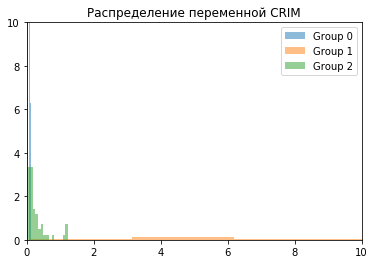

In [78]:
plt.hist(X_test[label_test == 0]['CRIM'], bins = 15, density = True, alpha = 0.5, label = 'Group 0')
plt.hist(X_test[label_test == 1]['CRIM'], bins = 15, density = True, alpha = 0.5, label = 'Group 1')
plt.hist(X_test[label_test == 2]['CRIM'], bins = 15, density = True, alpha = 0.5, label = 'Group 2')
plt.ylim([0,10])
plt.xlim([0,10])
plt.legend()
plt.title('Распределение переменной CRIM в разбивке по кластерам')

Text(0.5, 1.0, 'Распределение переменной CRIM')

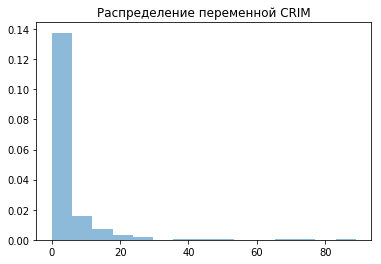

In [80]:
plt.hist(X['CRIM'], bins = 15, density = True, alpha = 0.5)
plt.title('Распределение переменной CRIM')